**Find publicly available data for key supply-demand factors that influence US home prices. Then, build a data science model that explains how these factors impacted home prices over the last 20 years.**

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

I DOWNLOADED DATA FROM FRED.STLOUISFED FOR THE KEY SUPPLY-DEMAND FACTORS. 
The key supply-demand factors are-
1. Unemployment rate (UNRATE) : https://fred.stlouisfed.org/series/UNRATE
2. Mortgage rate (MORTGAGE30US) : https://fred.stlouisfed.org/series/MORTGAGE30US
3. Monthly Supply of Houses in the United States (SUPPLY) : https://fred.stlouisfed.org/series/MSACSR
4. New One Family Houses Sold (HOUSES_SOLD) - https://fred.stlouisfed.org/series/HSN1F 
5. New Privately-Owned Housing Units Authorized in Permit-Issuing Places: Total Units (PERMITS)  -        https://fred.stlouisfed.org/series/PERMIT
6. Consumer Price Index (CPI) - https://fred.stlouisfed.org/series/CPIAUCSL
7. Effective Federal fund rate (EFFR) - https://fred.stlouisfed.org/series/EFFR
8. Economic growth (GDP) - https://fred.stlouisfed.org/series/GDP
9. Population (POPULATION) - https://fred.stlouisfed.org/series/POPTHM
10. Construction spending Residential (CONSTRUCTION_SPEND) - https://fred.stlouisfed.org/series/TLRESCONS

The target variable is Home Price Index (PRICE_INDEX) from https://fred.stlouisfed.org/series/CSUSHPISA 


# DATASET PROCESSING 

Since we had to build a data science model that explains how these factors impacted home prices over the last 20 years, the data is taken from 2002-01-01 to 2021-12-01.
We take 10 features and 1 target variable. 
There 240 observations per feature.

The UNRATE, CPI, PERMIT, POPULATION, CONSTRUCTION_SPEND, HOUSES_SOLD data is in MONTHLY frequency. 
The HCAI and GDP data is in QUARTARELY frequency.
The EFFR data is in DAILY frequency and the MORTGAGE30US data is in WEEKLY frequency.

So we resampling all the features data to MONTHLY frequency.

In [2]:
# TARGET VARIABLE -- HOME PRICE INDEX
# loading the excel file
target_df = pd.read_excel('CSUSHPISA.xls', skiprows = 10)
# setting observation_date as index in the dataframe
target_df.set_index('observation_date', inplace = True)
# changing data type of observation_date to datetime
target_df.index = pd.to_datetime(target_df.index)
target_df=target_df.resample('1M').mean() #resampling data to monthly freq
target_df.rename(columns = {'CSUSHPISA':'PRICE_INDEX'}, inplace = True) 
target_df

,PRICE_INDEX
observation_date,
2002-01-31,117.142
2002-02-28,117.844
2002-03-31,118.686
2002-04-30,119.610
2002-05-31,120.723
...,...
2021-08-31,267.183
2021-09-30,270.225
2021-10-31,272.976


In [3]:
# EFFECTIVE FEDERAL FUNDS RATE --
effr_df=pd.read_excel('EFFR.xls', skiprows = 10)
effr_df.set_index('observation_date', inplace=True)
effr_df.index = pd.to_datetime(effr_df.index)
effr_df=effr_df.resample('1M').mean()
effr_df

,EFFR
observation_date,
2002-01-31,1.671364
2002-02-28,1.745500
2002-03-31,1.726190
2002-04-30,1.758636
2002-05-31,1.682609
...,...
2021-08-31,0.093182
2021-09-30,0.075455
2021-10-31,0.075714


In [4]:
# GROSS DOMESTIC PRODUCT -
gdp_df = pd.read_excel('GDP.xls', skiprows = 10)
# since there were two missing observations at the end of the data on converting to monthly frequency,
# a small dataframe for the missing values has been created and concatenated.
gdp_enddate = pd.Series(pd.date_range("2021-11-30", freq="M", periods=2),dtype='datetime64[ns]',name='observation_date')
gdp_endgdp = pd.Series([np.nan,np.nan],dtype='float64',name='GDP')
gdp_dfend = pd.concat([gdp_enddate, gdp_endgdp],axis=1)
gdp_df = pd.concat([gdp_df, gdp_dfend])
gdp_df.set_index('observation_date', inplace=True)
gdp_df.index = pd.to_datetime(gdp_df.index)
# propogating the last observed non-null values forward
gdp_df = gdp_df.resample('1M').fillna(method='ffill')
gdp_df = gdp_df.fillna(method='ffill')
gdp_df

,GDP
observation_date,
2002-01-31,10783.500
2002-02-28,10783.500
2002-03-31,10783.500
2002-04-30,10887.460
2002-05-31,10887.460
...,...
2021-08-31,23202.344
2021-09-30,23202.344
2021-10-31,24008.472


In [5]:
# NEW ONE FAMILY HOUSES SOLD --
hsn1f_df = pd.read_excel('HSN1F.xls', skiprows = 10)
hsn1f_df.set_index('observation_date', inplace = True)
hsn1f_df.index = pd.to_datetime(hsn1f_df.index)
hsn1f_df = hsn1f_df.resample('1M').mean()
hsn1f_df.rename(columns = {'HSN1F':'HOUSES_SOLD'}, inplace = True)
hsn1f_df

,HOUSES_SOLD
observation_date,
2002-01-31,880.0
2002-02-28,948.0
2002-03-31,923.0
2002-04-30,936.0
2002-05-31,978.0
...,...
2021-08-31,668.0
2021-09-30,725.0
2021-10-31,667.0


In [6]:
# MORTGAGE RATE --
mort_df = pd.read_excel('MORTGAGE30US.xls', skiprows = 10)
mort_df.set_index('observation_date', inplace=True)
mort_df.index = pd.to_datetime(mort_df.index)
mort_df = mort_df.resample('1M').mean()
mort_df

,MORTGAGE30US
observation_date,
2002-01-31,6.9975
2002-02-28,6.8925
2002-03-31,7.0140
2002-04-30,6.9850
2002-05-31,6.8060
...,...
2021-08-31,2.8425
2021-09-30,2.9000
2021-10-31,3.0675


In [7]:
# MONTHLY SUPPLY OF HOUSES IN THE USA
msacr_df = pd.read_excel('MSACSR.xls', skiprows = 10)
msacr_df.set_index('observation_date', inplace=True)
msacr_df.index = pd.to_datetime(msacr_df.index)
msacr_df = msacr_df.resample('1M').mean()
msacr_df.rename(columns = {'MSACSR':'SUPPLY'}, inplace = True)
msacr_df

,SUPPLY
observation_date,
2002-01-31,4.2
2002-02-28,4.0
2002-03-31,4.1
2002-04-30,4.3
2002-05-31,4.0
...,...
2021-08-31,6.8
2021-09-30,6.3
2021-10-31,7.0


In [8]:
# NEW PRIVATELY - OWNED HOUSING UNITS AUTHORIZED IN PERMIT ISSUSING PLACES --
permit_df = pd.read_excel('PERMIT.xls', skiprows = 10)
permit_df.set_index('observation_date', inplace=True)
permit_df.index = pd.to_datetime(permit_df.index)
permit_df = permit_df.resample('1M').mean()
permit_df

,PERMIT
observation_date,
2002-01-31,1665.0
2002-02-28,1787.0
2002-03-31,1691.0
2002-04-30,1669.0
2002-05-31,1716.0
...,...
2021-08-31,1721.0
2021-09-30,1586.0
2021-10-31,1653.0


In [9]:
# POPULATION IN USA --
pop_df = pd.read_excel('POPTHM.xls', skiprows = 10)
pop_df.set_index('observation_date', inplace=True)
pop_df.index = pd.to_datetime(pop_df.index)
pop_df = pop_df.resample('1M').mean()
pop_df.rename(columns = {'POPTHM':'POPULATION'}, inplace = True)
pop_df

,POPULATION
observation_date,
2002-01-31,286739.0
2002-02-28,286935.0
2002-03-31,287131.0
2002-04-30,287343.0
2002-05-31,287571.0
...,...
2021-08-31,332295.0
2021-09-30,332403.0
2021-10-31,332513.0


In [10]:
# CONSTRUCTION SPENDING (RESIDENTIAL) --
cons_df = pd.read_excel('TLRESCONS.xls', skiprows = 10)
cons_df.set_index('observation_date', inplace=True)
cons_df.index = pd.to_datetime(cons_df.index)
cons_df = cons_df.resample('1M').mean()
cons_df.rename(columns = {'TLRESCONS':'CONSTRUCTION_SPEND'}, inplace = True)
cons_df

,CONSTRUCTION_SPEND
observation_date,
2002-01-31,382979.0
2002-02-28,391434.0
2002-03-31,390942.0
2002-04-30,404255.0
2002-05-31,399164.0
...,...
2021-08-31,789620.0
2021-09-30,800118.0
2021-10-31,804575.0


In [11]:
# UNEMPLOYEMENT RATE --
unrate_df = pd.read_excel('UNRATE.xls', skiprows = 10)
unrate_df.set_index('observation_date', inplace=True)
unrate_df.index = pd.to_datetime(unrate_df.index)
unrate_df = unrate_df.resample('1M').mean()
unrate_df

,UNRATE
observation_date,
2002-01-31,5.7
2002-02-28,5.7
2002-03-31,5.7
2002-04-30,5.9
2002-05-31,5.8
...,...
2021-08-31,5.2
2021-09-30,4.7
2021-10-31,4.6


In [12]:
# CONSUMER PRICE INDEX
cpi_df = pd.read_excel('CPIAUCSL.xls', skiprows = 10)
cpi_df.set_index('observation_date', inplace=True)
cpi_df.index = pd.to_datetime(cpi_df.index)
cpi_df=cpi_df.resample('1M').mean()
cpi_df.rename(columns = {'CPIAUCSL':'CPI'}, inplace = True)
cpi_df

,CPI
observation_date,
2002-01-31,177.700
2002-02-28,178.000
2002-03-31,178.500
2002-04-30,179.300
2002-05-31,179.500
...,...
2021-08-31,273.092
2021-09-30,274.214
2021-10-31,276.590


In [13]:
# the individual dataframes for the features is in concatenated into one features_df dataframe.
features_df=pd.concat([effr_df, gdp_df, hsn1f_df, mort_df, msacr_df, permit_df, pop_df, cons_df, unrate_df, cpi_df],axis=1)
features_df

,EFFR,GDP,HOUSES_SOLD,MORTGAGE30US,SUPPLY,PERMIT,POPULATION,CONSTRUCTION_SPEND,UNRATE,CPI
observation_date,,,,,,,,,,
2002-01-31,1.671364,10783.500,880.0,6.9975,4.2,1665.0,286739.0,382979.0,5.7,177.700
2002-02-28,1.745500,10783.500,948.0,6.8925,4.0,1787.0,286935.0,391434.0,5.7,178.000
2002-03-31,1.726190,10783.500,923.0,7.0140,4.1,1691.0,287131.0,390942.0,5.7,178.500
2002-04-30,1.758636,10887.460,936.0,6.9850,4.3,1669.0,287343.0,404255.0,5.9,179.300
2002-05-31,1.682609,10887.460,978.0,6.8060,4.0,1716.0,287571.0,399164.0,5.8,179.500
...,...,...,...,...,...,...,...,...,...,...
2021-08-31,0.093182,23202.344,668.0,2.8425,6.8,1721.0,332295.0,789620.0,5.2,273.092
2021-09-30,0.075455,23202.344,725.0,2.9000,6.3,1586.0,332403.0,800118.0,4.7,274.214
2021-10-31,0.075714,24008.472,667.0,3.0675,7.0,1653.0,332513.0,804575.0,4.6,276.590


In [14]:
# combining target variable PRICE_INDEX with the features
data = pd.concat([features_df, target_df], axis = 1)
data

,EFFR,GDP,HOUSES_SOLD,MORTGAGE30US,SUPPLY,PERMIT,POPULATION,CONSTRUCTION_SPEND,UNRATE,CPI,PRICE_INDEX
observation_date,,,,,,,,,,,
2002-01-31,1.671364,10783.500,880.0,6.9975,4.2,1665.0,286739.0,382979.0,5.7,177.700,117.142
2002-02-28,1.745500,10783.500,948.0,6.8925,4.0,1787.0,286935.0,391434.0,5.7,178.000,117.844
2002-03-31,1.726190,10783.500,923.0,7.0140,4.1,1691.0,287131.0,390942.0,5.7,178.500,118.686
2002-04-30,1.758636,10887.460,936.0,6.9850,4.3,1669.0,287343.0,404255.0,5.9,179.300,119.610
2002-05-31,1.682609,10887.460,978.0,6.8060,4.0,1716.0,287571.0,399164.0,5.8,179.500,120.723
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,0.093182,23202.344,668.0,2.8425,6.8,1721.0,332295.0,789620.0,5.2,273.092,267.183
2021-09-30,0.075455,23202.344,725.0,2.9000,6.3,1586.0,332403.0,800118.0,4.7,274.214,270.225
2021-10-31,0.075714,24008.472,667.0,3.0675,7.0,1653.0,332513.0,804575.0,4.6,276.590,272.976


# EXPLORATORY DATA ANALYSIS 

In [15]:
# CHECKING FOR MISSING VALUES IN THE DATASET
data.isna().sum(axis='rows')

EFFR                  0
GDP                   0
HOUSES_SOLD           0
MORTGAGE30US          0
SUPPLY                0
PERMIT                0
POPULATION            0
CONSTRUCTION_SPEND    0
UNRATE                0
CPI                   0
PRICE_INDEX           0
dtype: int64

In [16]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 2002-01-31 to 2021-12-31
Freq: M
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EFFR                240 non-null    float64
 1   GDP                 240 non-null    float64
 2   HOUSES_SOLD         240 non-null    float64
 3   MORTGAGE30US        240 non-null    float64
 4   SUPPLY              240 non-null    float64
 5   PERMIT              240 non-null    float64
 6   POPULATION          240 non-null    float64
 7   CONSTRUCTION_SPEND  240 non-null    float64
 8   UNRATE              240 non-null    float64
 9   CPI                 240 non-null    float64
 10  PRICE_INDEX         240 non-null    float64
dtypes: float64(11)
memory usage: 30.6 KB
None


There are no missing or categorical values in our dataset.
Next, we create a heatmap to check collinearity between the features and target in the data.

# CORRELATION

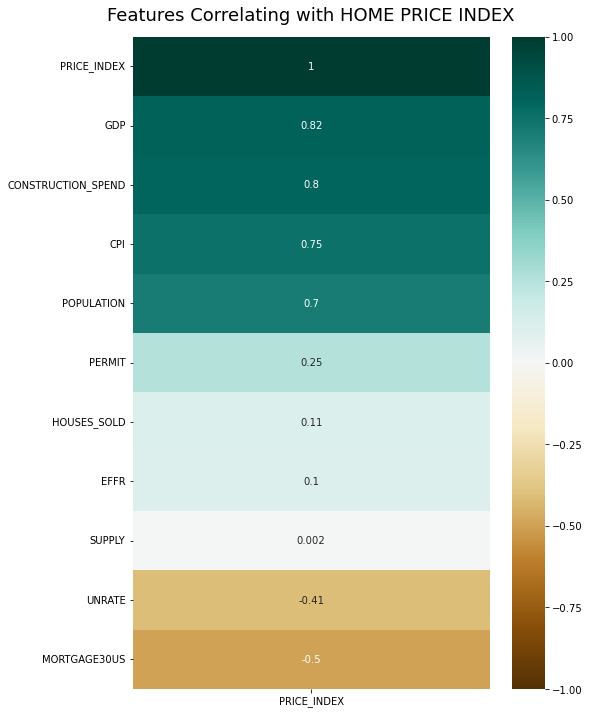

In [17]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['PRICE_INDEX']].sort_values(by='PRICE_INDEX', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with HOME PRICE INDEX', fontdict={'fontsize':18}, pad=16);

There is high correlation between (=0.82) between GDP and PRICE_INDEX. And negative correlation between PRICE_INDEX and MORTGAGE30US.

<AxesSubplot:>

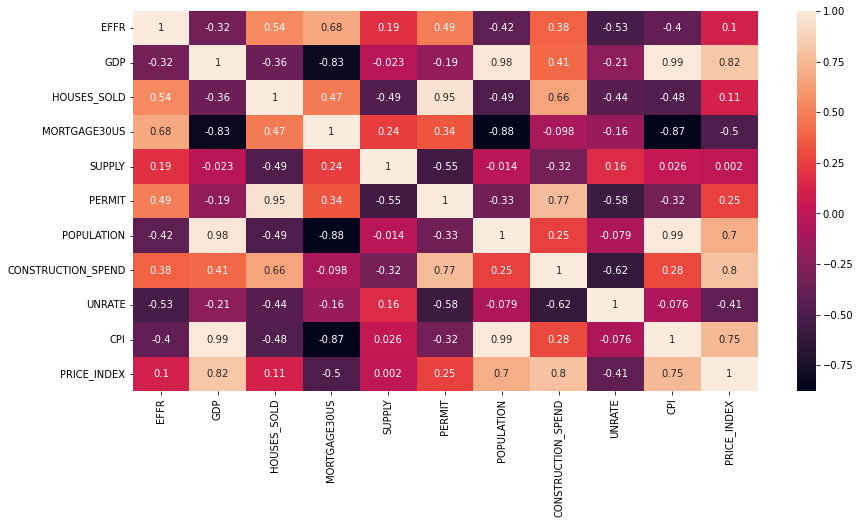

In [18]:
# CHECKING CORRELATION BETWEEN FEATURES 
data_corr=data.corr()
plt.figure(figsize=(14,7))
sns.heatmap(data_corr, annot = True)

From the heatmap, we see that the CPI, POPULATION is highly correlated with GDP. And PERMIT is highly correlated with HOUSES_SOLD.
I chose a thershold of 0.9 and dropped CPI, POPULATION and PERMIT.  

In [19]:
threshold = 0.9
columns = np.full((data_corr.shape[0],), True, dtype=bool)
for i in range(data_corr.shape[0]):
    for j in range(i+1, data_corr.shape[0]):
        if data_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
print(selected_columns)
data = data[selected_columns]

Index(['EFFR', 'GDP', 'HOUSES_SOLD', 'MORTGAGE30US', 'SUPPLY',
       'CONSTRUCTION_SPEND', 'UNRATE', 'PRICE_INDEX'],
      dtype='object')


# SKEWNESS 

In [20]:
# SKEWNESS 
skewed_list = []
for i in data:
    if abs(data[i].skew()) > 1:
        skewed_list.append(i)
skewed_list

['EFFR', 'SUPPLY', 'UNRATE']

In [21]:
data.skew()

EFFR                  1.366661
GDP                   0.236308
HOUSES_SOLD           0.586496
MORTGAGE30US          0.200521
SUPPLY                1.211121
CONSTRUCTION_SPEND    0.235550
UNRATE                1.086206
PRICE_INDEX           0.923303
dtype: float64

The features which have skewness of greater than 1 are applied log1p transformation to reduce skewness.
After log1p, the skewness of all the factors became less than 0.7

In [22]:
# APPLYING BOX-COX TRANSFORMATION TO REDUCE SKEWNESS OF THE FEATURES
#from scipy.special import boxcox1p
data[skewed_list] = data[skewed_list].apply(lambda i: np.log1p(i))
data.skew()

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


EFFR                  0.656394
GDP                   0.236308
HOUSES_SOLD           0.586496
MORTGAGE30US          0.200521
SUPPLY                0.674109
CONSTRUCTION_SPEND    0.235550
UNRATE                0.528821
PRICE_INDEX           0.923303
dtype: float64

In [23]:
cols = ['EFFR', 'GDP', 'HOUSES_SOLD', 'MORTGAGE30US', 'SUPPLY', 'CONSTRUCTION_SPEND', 'UNRATE']

# TRAINING AND TEST SET

In [24]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,:-1]
y = data['PRICE_INDEX']
y = y.to_frame()

# Split the data into 70% training set and 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
train_data = pd.concat([X_train, y_train])
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

# now we have 168 observations in X_train set and 72 observations in X_test.

(168, 7)
(168, 1)
(72, 7)
(72, 1)


(None, None)

# SCALING

In [25]:
# I used standard scaler to transform our data into a distribution with mean value of 0 
#and standard deviation 1.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# MODEL SELECTION

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
xgb.set_config(verbosity=0)
import lightgbm as lgb

from numpy import mean
from numpy import absolute
from numpy import sqrt
import warnings
warnings.filterwarnings('ignore')

I decided to use K-fold cross validation technique with 10 folds as we had a small dataset.
The scoring criteria I chose is Root Mean Squared Error (RMSE).

In [27]:
# I defined a function that implements cv fold and returns rmse 
def score_cv(model):
    kf = KFold(n_splits = 10, shuffle=True, random_state = 1)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

Since this was a regression problem, I used mostly ensemble learning methods. 

A Bagging algorithm - Random Forest.

Boosting algorithms - Gradient Boosting, Light Gradient Boosting and XG Boosting.

I also used ElasticNet Regression Algorithm which is a hybrid of Lasso and Ridge regression techniques.

In [28]:
# ELASTIC NET REGRESSION
model_ENet = ElasticNet(alpha = 0.0005, l1_ratio = 0.9, random_state = 1)

# GRADIENT BOOSTING REGRESSION
model_GBM = GradientBoostingRegressor(n_estimators = 1000, learning_rate = 0.05, max_depth = 5, random_state = 42)

#  REGRESSION
model_XGB = xgb.XGBRegressor(learning_rate = 0.05, max_depth = 4, min_child_weight = 1, n_estimators = 1000, random_state = 1, nthreads=-1, booster = 'gbtree')

# LIGHT GRADIENT BOOSTING MACHINE
model_LGB = lgb.LGBMRegressor(objective = 'regression',num_leaves = 10, learning_rate = 0.05, n_estimators = 1000, random_state = 1)

# K-NEAREST NEIGHBOUR
model_knn = KNeighborsRegressor(n_neighbors = 3)

# RANDOM FOREST REGRESSION
model_rf = RandomForestRegressor(n_estimators = 300, random_state = 1, n_jobs = -1, max_features = 'auto', max_depth = 60)

In [29]:
# calling the function to calculate rmse score on X_train and y_train for each model
score = score_cv(model_ENet)
print("ElasticNet score: {:.4f}\n".format(score.mean()))

score = score_cv(model_GBM)
print("Gradient Boosting score: {:.4f}\n".format(score.mean()))

score = score_cv(model_XGB)
print("Xgboost score: {:.4f}\n".format(score.mean()))

score = score_cv(model_LGB)
print("LGBM score: {:.4f}\n" .format(score.mean()))

score = score_cv(model_knn)
print("KNN score: {:.4f}\n" .format(score.mean()))

score = score_cv(model_rf)
print("Random Forest Regressor score: {:.4f}\n" .format(score.mean()))

ElasticNet score: 3.9036

Gradient Boosting score: 2.5880

Xgboost score: 2.9803

LGBM score: 4.5412

KNN score: 3.2579

Random Forest Regressor score: 2.8505



From the RMSE scores on K-fold validation, I decided to proceed with Gradient Boosting, Random Forest and XGBoost for further evaluation on test set.

In [30]:
# FITTING Gradient Boosting model ON TRAIN SET
model_GBM.fit(X_train, y_train)
y_train_pred_gbm = model_GBM.predict(X_train)
y_train_pred_gbm = y_train_pred_gbm.reshape(168,1)
y_test_pred_gbm = model_GBM.predict(X_test)
y_test_pred_gbm = y_test_pred_gbm.reshape(72,1)

print('Root Mean Squared Error on test set for GBM:', np.sqrt(mean_squared_error(y_test, y_test_pred_gbm)))

Root Mean Squared Error on test set for GBM: 2.2936556855974946


In [31]:
# FITTING XG Boosting MODEL ON TRAIN SET
model_XGB.fit(X_train, y_train)
y_train_pred_xgb = model_XGB.predict(X_train)
y_train_pred_xgb = y_train_pred_xgb.reshape(168,1)
y_test_pred_xgb = model_XGB.predict(X_test)
y_test_pred_xgb = y_test_pred_xgb.reshape(72,1)

print('Root Mean Squared Error on test set for XGB:', np.sqrt(mean_squared_error(y_test, y_test_pred_xgb)))

Root Mean Squared Error on test set for XGB: 2.264708554067826


In [32]:
# FITTING Random Forest MODEL ON TRAIN SET
model_rf.fit(X_train, y_train)
y_train_pred_rf = model_rf.predict(X_train)
y_train_pred_rf = y_train_pred_rf.reshape(168,1)
y_test_pred_rf = model_rf.predict(X_test)
y_test_pred_rf = y_test_pred_rf.reshape(72,1)

print('Root Mean Squared Error on test set for rf:', np.sqrt(mean_squared_error(y_test, y_test_pred_rf)))

Root Mean Squared Error on test set for rf: 2.203205696590807


The models perform well on test set too. There is little variation between valid RMSE and test RMSE.

The **Random Forest Model** has been chosen as the best fitting model on this dataset keeping in mind the RMSE score of both the test set and valid set.

# FEATURE IMPORTANCE

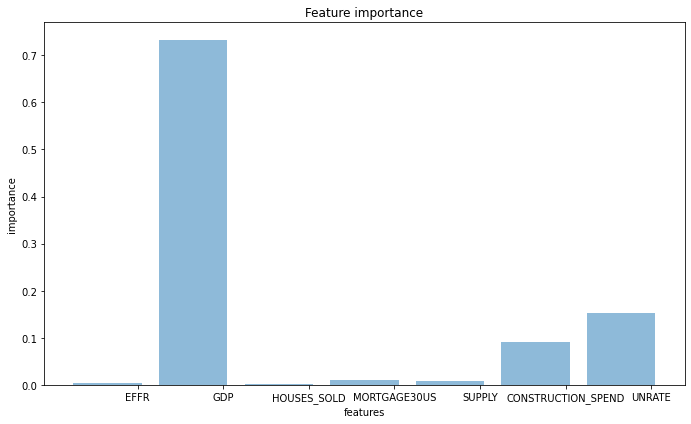

In [33]:
# feature importance in GBM model
plt.figure(figsize=(6 * 1.618, 6))
index = np.arange(len(cols))
bar_width = 0.35
plt.bar(index, model_GBM.feature_importances_, alpha=0.5)
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Feature importance')
plt.xticks(index + bar_width, cols)
plt.tight_layout()
plt.show()

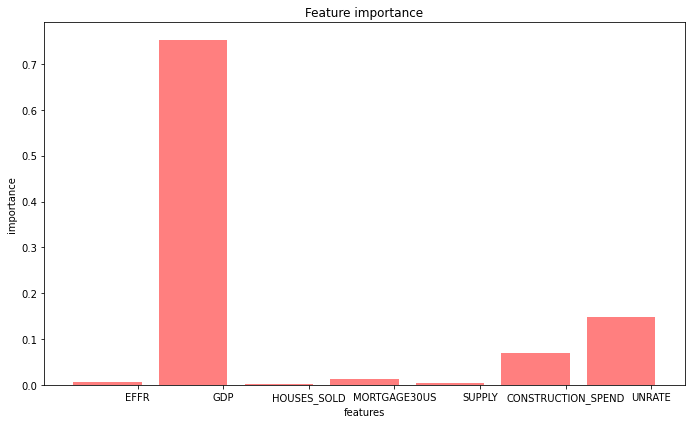

In [34]:
# feature importance in Random Forest model
plt.figure(figsize=(6 * 1.618, 6))
index = np.arange(len(cols))
bar_width = 0.35
plt.bar(index, model_rf.feature_importances_, color='red', alpha=0.5)
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Feature importance')
plt.xticks(index + bar_width, cols)
plt.tight_layout()
plt.show()

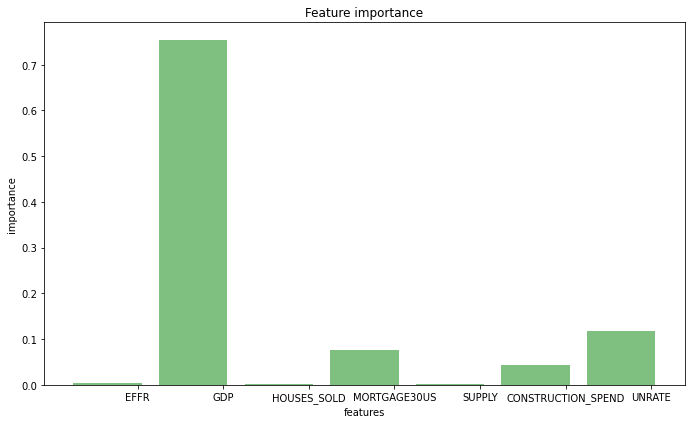

In [35]:
# feature importance in XG Boosting  model
plt.figure(figsize=(6 * 1.618, 6))
index = np.arange(len(cols))
bar_width = 0.35
plt.bar(index, model_XGB.feature_importances_, color='green', alpha=0.5)
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Feature importance')
plt.xticks(index + bar_width, cols)
plt.tight_layout()
plt.show()

The feature importance graph shows that :
1. **GDP (GROSS DOMESTIC PRODUCT)** is the most important feature in all the three models.

2. The second most important feature is **UNRATE (UNEMPLOYEMENT RATE)**.

3. In XGBoost, **MORTGAGE30US (MORTGAGE RATE)** is the third most important feature. While in            Random Forest and Gradient Boosting Machine, **CONSTRUCTION_SPEND** is the third most important        feature.

4. Rest, **SUPPLY OF HOUSES**, **EFFR** and **HOUSES_SOLD** follow respectively.
       



# PLOTTING RESIDUALS AND PREDICTIONS :

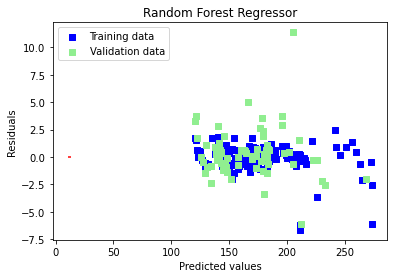

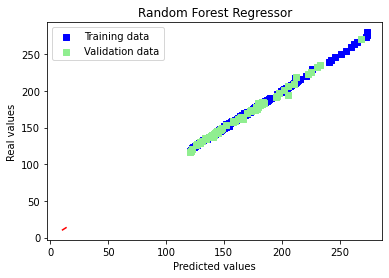

In [36]:
# Plotting residuals of RF model
plt.scatter(y_train_pred_rf, y_train_pred_rf - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred_rf, y_test_pred_rf - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Random Forest Regressor")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plotting predictions of RF model
plt.scatter(y_train_pred_rf, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred_rf, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Random Forest Regressor")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()  


# REFERENCES FOR FACTORS-
https://www.reddit.com/r/datasets/comments/bn4z93/housing_related_data/
https://www.reddit.com/r/econmonitor/comments/dqlvwy/topic_megathread_data_sources_using_fred/


In [37]:
#DISCARDED CODE --

In [38]:
"""
# KNN 
knn_reg = KNeighborsRegressor(n_neighbors = 3)
knn_reg.fit(X_train, y_train)
pred_knn = knn_reg.predict(X_test)
#acc_knn = accuracy_score(y_test, pred_knn)
rmse = np.sqrt(mean_squared_error(y_test, pred_knn))
print("RMSE: %f" % (rmse))
"""

'\n# KNN \nknn_reg = KNeighborsRegressor(n_neighbors = 3)\nknn_reg.fit(X_train, y_train)\npred_knn = knn_reg.predict(X_test)\n#acc_knn = accuracy_score(y_test, pred_knn)\nrmse = np.sqrt(mean_squared_error(y_test, pred_knn))\nprint("RMSE: %f" % (rmse))\n'

In [39]:
"""
# LINEAR REGRESSION 
linreg = LinearRegression()
linreg.fit(X_train, y_train)
pred_linreg = linreg.predict(X_test)
#print(regr.score(X_test, y_test))
rmse_linreg = np.sqrt(mean_squared_error(y_test, pred_linreg))
print("RMSE: %f" % (rmse_linreg))
"""

'\n# LINEAR REGRESSION \nlinreg = LinearRegression()\nlinreg.fit(X_train, y_train)\npred_linreg = linreg.predict(X_test)\n#print(regr.score(X_test, y_test))\nrmse_linreg = np.sqrt(mean_squared_error(y_test, pred_linreg))\nprint("RMSE: %f" % (rmse_linreg))\n'

In [40]:
"""
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True) 

#build multiple linear regression model
model = LinearRegression()

#use LOOCV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

rmse=sqrt(mean(absolute(scores)))
#rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
"""

'\n#define cross-validation method to use\ncv = KFold(n_splits=10, random_state=1, shuffle=True) \n\n#build multiple linear regression model\nmodel = LinearRegression()\n\n#use LOOCV to evaluate model\nscores = cross_val_score(model, X, y, scoring=\'neg_mean_squared_error\', cv=cv, n_jobs=-1)\n\nrmse=sqrt(mean(absolute(scores)))\n#rmse = np.sqrt(mean_squared_error(y_test, preds))\nprint("RMSE: %f" % (rmse))\n'

In [41]:
"""
# XG-BOOST REGRESSOR
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 1000, seed = 123, learning_rate=0.1)
xgb_r.fit(X_train, y_train)
pred_xgb = xgb_r.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred_xgb))
print("RMSE : % f" %(rmse))
"""

'\n# XG-BOOST REGRESSOR\nimport xgboost as xg\nxgb_r = xg.XGBRegressor(objective =\'reg:squarederror\', n_estimators = 1000, seed = 123, learning_rate=0.1)\nxgb_r.fit(X_train, y_train)\npred_xgb = xgb_r.predict(X_test)\nrmse = np.sqrt(mean_squared_error(y_test, pred_xgb))\nprint("RMSE : % f" %(rmse))\n'

In [42]:
"""
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True) 

#build multiple linear regression model
model = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 1000, seed = 123, learning_rate=0.1)

#use LOOCV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

rmse=sqrt(mean(absolute(scores)))
#rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
"""

'\n#define cross-validation method to use\ncv = KFold(n_splits=10, random_state=1, shuffle=True) \n\n#build multiple linear regression model\nmodel = xg.XGBRegressor(objective =\'reg:squarederror\', n_estimators = 1000, seed = 123, learning_rate=0.1)\n\n#use LOOCV to evaluate model\nscores = cross_val_score(model, X, y, scoring=\'neg_mean_squared_error\', cv=cv, n_jobs=-1)\n\nrmse=sqrt(mean(absolute(scores)))\n#rmse = np.sqrt(mean_squared_error(y_test, preds))\nprint("RMSE: %f" % (rmse))\n'

In [43]:
"""
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))

SVR_regressor = SVR(kernel='poly')
SVR_regressor.fit(X_train,y_train.values.ravel())
#5 Predicting a new result
y_pred = SVR_regressor.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
"""

'\nscores = []\nbest_svr = SVR(kernel=\'rbf\')\ncv = KFold(n_splits=10, random_state=42, shuffle=True)\nfor train_index, test_index in cv.split(X):\n    print("Train Index: ", train_index, "\n")\n    print("Test Index: ", test_index)\n\n    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]\n    best_svr.fit(X_train, y_train)\n    scores.append(best_svr.score(X_test, y_test))\n\nSVR_regressor = SVR(kernel=\'poly\')\nSVR_regressor.fit(X_train,y_train.values.ravel())\n#5 Predicting a new result\ny_pred = SVR_regressor.predict(X_test)\nprint(\'Root Mean Squared Error:\', np.sqrt(mean_squared_error(y_test, y_pred)))\n'